In [22]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
import errores as er
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
import pickle

sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

In [24]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
#fpath ='/Users/falconlab/Documents/GitHub/Tesis/data/low/'
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')


0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Len

In [25]:

train = utils.subsample(train, 2)
test = utils.subsample(test, 2)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))

amplitude = data.data['Amplitude'].values
amplitude = scaler.transform(amplitude.reshape(-1, 1))
defectos = data.defectos_set()

In [26]:
filename = 'GBoost_model.sav'
model = pickle.load(open(filename, 'rb'))


## **50 steps**

In [27]:
steps = 50 
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test).squeeze()


In [28]:
test50 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test50_GBoost_defectos.csv", test50, delimiter=",")

100%|██████████| 95/95 [00:01<00:00, 49.23it/s]


In [29]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.002199056812943004
Mean Absolute Percentage Error: 1.1646871201493725
R2 Score: -0.5395466704675288
Root Mean Squared Error: 0.03943746090623013


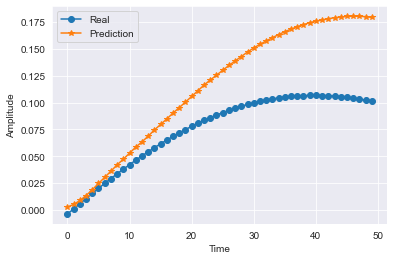

In [30]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **100 steps**

In [31]:
steps = 100 
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test).squeeze()

In [32]:
test100 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test100_GBoost_defectos.csv", test100, delimiter=",")

100%|██████████| 95/95 [00:03<00:00, 24.55it/s]


In [33]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.004602265885019339
Mean Absolute Percentage Error: 1.3669914887361534
R2 Score: -0.37922519005476396
Root Mean Squared Error: 0.06155852912967659


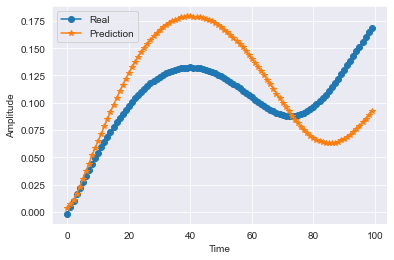

In [34]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **500 steps**

In [35]:
steps = 500
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test).squeeze()

In [36]:
test500 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test500_GBoost_defectos.csv", test500, delimiter=",")

100%|██████████| 95/95 [00:18<00:00,  5.08it/s]


In [37]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.006469332029835434
Mean Absolute Percentage Error: 1.7067062298951625
R2 Score: -0.16460200361985042
Root Mean Squared Error: 0.07869957048406703


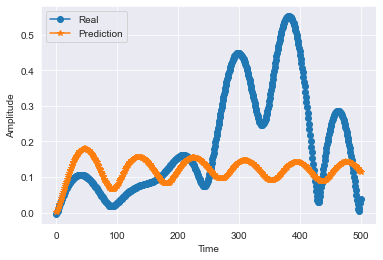

In [38]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **1000 steps**

In [39]:
steps = 1000
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test).squeeze()

In [40]:
test1000 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test1000_GBoo_defectos.csv", test1000, delimiter=",")

100%|██████████| 95/95 [00:37<00:00,  2.56it/s]


In [41]:
mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.00799306623441257
Mean Absolute Percentage Error: 1.617962834062998
R2 Score: -0.11682621623359894
Root Mean Squared Error: 0.08744483523289287


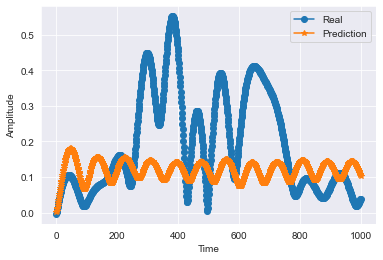

In [42]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test1000[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()